In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 28

In [ ]:
@author: Ganesh Prasad
"""

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#import xgboost as xgb
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
df_train = pd.read_excel(r'train_agriculture.xlsx')
df_test = pd.read_excel(r'test_agriculture.xlsx')

In [7]:
print("Column headings:")
print(df_train.columns)

Column headings:
Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')


In [8]:
print("Look into Data",df_train.head(10))

Look into Data           ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   
5  F00000008                      448          0          1   
6  F00000009                      448          0          1   
7  F00000010                      577          1          0   
8  F00000012                      731          0          0   
9  F00000020                     1132          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                0.0   
1                       1                  0                0.0   
2                       1                  0                0.0   
3                      

In [9]:
print("\n Shape of the train dataset",df_train.shape)


 Shape of the train dataset (4599, 10)


Missing value in dataset

In [10]:
print("\n Missing Value in train data set" ,df_train.isnull().sum())
print("\n Missing Value in test data set" ,df_test.isnull().sum())


 Missing Value in train data set ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

 Missing Value in test data set ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64


Class distribution

In [11]:
print("\n Class Distribution counts ",df_train['Crop_Damage'].value_counts())
print("\n Class Distribution counts ",df_train.groupby('Crop_Damage').size())


 Class Distribution counts  0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

 Class Distribution counts  Crop_Damage
0    3820
1     664
2     115
dtype: int64


Concatenation of Data train and test after that split of data will do and Seprate the X and Y<br>
rint(df_train.shape)<br>
rint(df_test.shape)

In [12]:
df_train['train_test']='training_data'
df_test['train_test']='testing_data'

In [13]:
df_data = pd.concat((df_train, df_test),sort=False)

In [14]:
print("\n Look into data after concatenate", df_data.head(10))


 Look into data after concatenate           ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   
5  F00000008                      448          0          1   
6  F00000009                      448          0          1   
7  F00000010                      577          1          0   
8  F00000012                      731          0          0   
9  F00000020                     1132          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                0.0   
1                       1                  0                0.0   
2                       1                  0                0.0   
3  

Null value check in dataset after concatenate

In [15]:
print("Null Valve in dataset after concatenate", df_data.isnull().sum())

Null Valve in dataset after concatenate ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
train_test                    0
dtype: int64


In [16]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_data['Number_Weeks_Used'].values.reshape(-1,1))
imp_mean.fit(df_data['Crop_Damage'].values.reshape(-1,1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [17]:
df_data['Number_Weeks_Used'] = imp_mean.transform(df_data['Number_Weeks_Used'].values.reshape(-1,1))
df_data['Crop_Damage'] = imp_mean.transform(df_data['Crop_Damage'].values.reshape(-1,1))

In [18]:
print("Null Valve in dataset after Impute", df_data.isnull().sum())

Null Valve in dataset after Impute ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
train_test                 0
dtype: int64


Look into data after impute nan with mean values

In [19]:
print("Look into data after impute nan with mean values ",df_data.head(10))
print("Colums after impute", df_data.columns)

Look into data after impute nan with mean values            ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   
5  F00000008                      448          0          1   
6  F00000009                      448          0          1   
7  F00000010                      577          1          0   
8  F00000012                      731          0          0   
9  F00000020                     1132          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0            0.00000   
1                       1                  0            0.00000   
2                       1                  0           

Drop Id field having no value added for data

In [20]:
df_data.drop('ID',axis=1,inplace=True)
print("Data and shape after drop of id",df_data.shape)

Data and shape after drop of id (5798, 10)


Split-out validation dataset

In [21]:
train_data=df_data.loc[df_data.train_test.isin(['training_data'])]
test_data=df_data.loc[df_data.train_test.isin(['testing_data'])]

In [22]:
train_data.drop(['train_test'],axis=1,inplace=True)
test_data.drop(['train_test'],axis=1,inplace=True)

In [23]:
print("train and test shape",train_data.shape, test_data.shape)

train and test shape (4599, 9) (1199, 9)


visualize the correlations between the attributes.<br>
correlation matrix

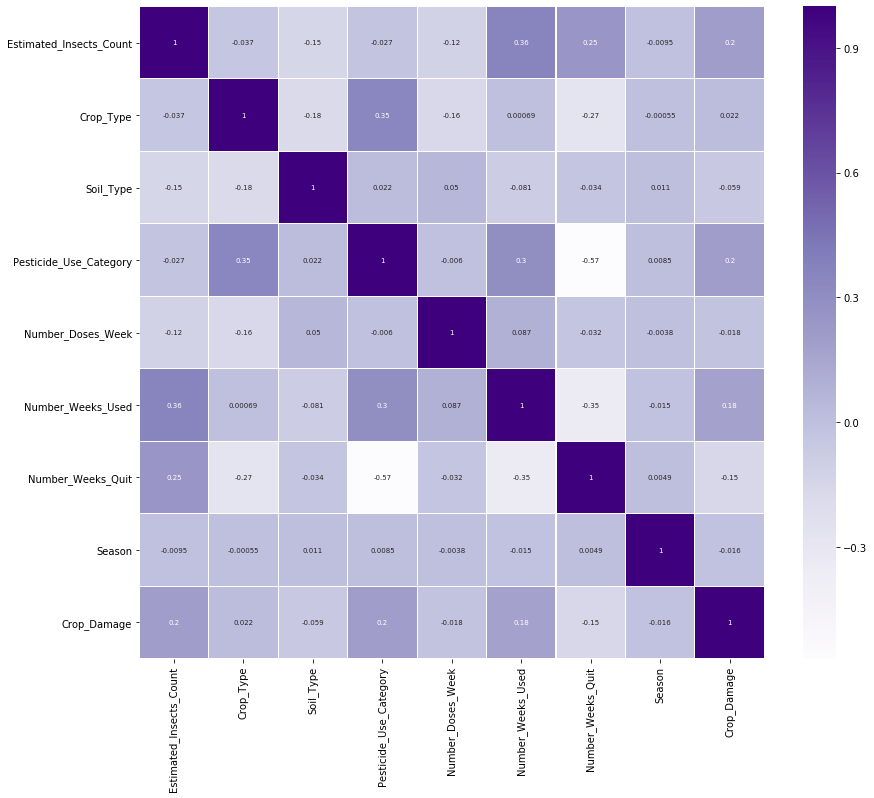

In [24]:
plt.figure(figsize=(14,12))
sns.heatmap(train_data.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

In [25]:
X_train, Y_train = train_data.drop(["Crop_Damage"], axis=1).values, train_data["Crop_Damage"].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=44)

In [27]:
print("Shape of test and train data", X_train.shape, Y_train.shape, X_test.shape)

Shape of test and train data (3679, 8) (4599,) (920, 8)


In [30]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
#models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

In [31]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22,shuffle=True)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    #print(name, cv_result)
    results.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

LR: 0.829301 (0.001677)
NB: 0.817613 (0.002496)
RF: 0.814895 (0.000322)
SVC: 0.834466 (0.001404)
Dtree: 0.746400 (0.005639)
KNN: 0.818972 (0.003311)


Output for Accuracy

R: 0.836912 (0.000044)<br>
B: 0.817613 (0.002496)<br>
F: 0.825225 (0.003486)<br>
VC: 0.832563 (0.000046)<br>
tree: 0.742595 (0.005638)<br>
GB: 0.815439 (0.001409)<br>
NN: 0.818972 (0.003311)<br>
ccuracy: 0.837 (0.000)

Compare Algorithms

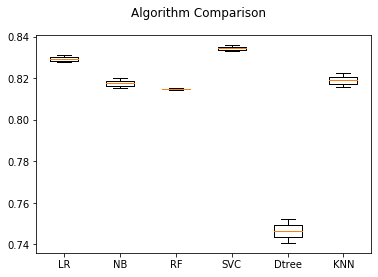

In [32]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

######### Logistic Regression Model #########

In [33]:
Lkfold = KFold(n_splits=2, random_state=22,shuffle=True)
Lmodel = LogisticRegression()
#################Accuracy Check for Logistic as per spot check of Algo##########
scoring = 'accuracy'
results = cross_val_score(Lmodel, X_train,y_train, cv=Lkfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
#########prediction on test data#######
ns_probs = [0 for _ in range(len(y_test))]
Lmodel.fit(X_train, y_train)
lr_probs = Lmodel.predict_proba(X_test)
preds=np.argmax(lr_probs,axis=1)
##########prediction on full data and contenation with ID########
a=test_data.drop(['Crop_Damage'],axis=1)
lr_probs_test = Lmodel.predict_proba(a)
preds_test=np.argmax(lr_probs_test,axis=1)
test_data['Crop_Damage']=preds_test
combine_test= pd.concat([df_test['ID'], test_data['Crop_Damage']], axis=1)
combine_test.to_csv("FinalSubmitOutput.csv",index=False)

Accuracy: 0.829 (0.002)


######################<br>
Standardize the dataset

In [34]:
num_folds=2
seed=22

In [36]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('EN',RandomForestClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))
pipelines.append(('ScaledDtree', Pipeline([('Scaler', StandardScaler()),('Dtree',DecisionTreeClassifier())])))
#pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB',xgb.XGBClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

In [37]:
results = []
names = []

In [38]:
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Output is
#ScaledLR: 0.828214 (0.000047)
#ScaledNB: 0.817613 (0.002496)
#ScaledRF: 0.823321 (0.001679)
#ScaledSVC: 0.839359 (0.001859)
#ScaledDtree: 0.743410 (0.004823)
#ScaledXGB: 0.815439 (0.001409)
#ScaledKNN: 0.828487 (0.003487)
## Compare Algorithms

ScaledLR: 0.827671 (0.000047)
ScaledNB: 0.817613 (0.002496)
ScaledRF: 0.814896 (0.004027)
ScaledSVC: 0.839359 (0.001859)
ScaledDtree: 0.751835 (0.000748)
ScaledKNN: 0.828487 (0.003487)


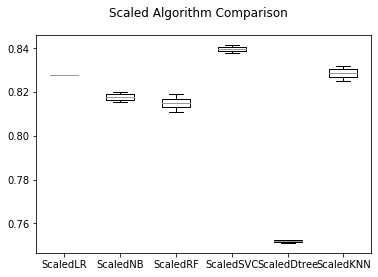

In [39]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

fter scaled of data SVC is having more accuracy that 83% now do the Tunning of SVC<br>
and its observed from output that it is lightly inproved 83 to 84 going with Ensemble<br>
technique before finalizing the Model<br>
Tune scaled SVM

In [40]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840446 using {'C': 2.0, 'kernel': 'rbf'}
0.832563 (0.000046) with: {'C': 0.1, 'kernel': 'linear'}
0.839902 (0.002403) with: {'C': 0.1, 'kernel': 'poly'}
0.832563 (0.000046) with: {'C': 0.1, 'kernel': 'rbf'}
0.831476 (0.001041) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.832563 (0.000046) with: {'C': 0.3, 'kernel': 'linear'}
0.839902 (0.002403) with: {'C': 0.3, 'kernel': 'poly'}
0.836369 (0.001675) with: {'C': 0.3, 'kernel': 'rbf'}
0.798315 (0.007012) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.832563 (0.000046) with: {'C': 0.5, 'kernel': 'linear'}
0.839902 (0.002403) with: {'C': 0.5, 'kernel': 'poly'}
0.837999 (0.000500) with: {'C': 0.5, 'kernel': 'rbf'}
0.785811 (0.008640) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.832563 (0.000046) with: {'C': 0.7, 'kernel': 'linear'}
0.839630 (0.002131) with: {'C': 0.7, 'kernel': 'poly'}
0.838543 (0.001043) with: {'C': 0.7, 'kernel': 'rbf'}
0.773580 (0.011083) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.832563 (0.000046) with: {'C': 0.9, 'kernel': 'linear'

utput is<br>
est: 0.840175 using {'C': 2.0, 'kernel': 'rbf'}<br>
.832563 (0.000046) with: {'C': 0.1, 'kernel': 'linear'}<br>
.839903 (0.002403) with: {'C': 0.1, 'kernel': 'poly'}<br>
.832563 (0.000046) with: {'C': 0.1, 'kernel': 'rbf'}<br>
.831476 (0.001041) with: {'C': 0.1, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 0.3, 'kernel': 'linear'}<br>
.839903 (0.002403) with: {'C': 0.3, 'kernel': 'poly'}<br>
.836368 (0.001675) with: {'C': 0.3, 'kernel': 'rbf'}<br>
.797230 (0.007556) with: {'C': 0.3, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 0.5, 'kernel': 'linear'}<br>
.839903 (0.002403) with: {'C': 0.5, 'kernel': 'poly'}<br>
.838000 (0.000500) with: {'C': 0.5, 'kernel': 'rbf'}<br>
.784726 (0.007552) with: {'C': 0.5, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 0.7, 'kernel': 'linear'}<br>
.839903 (0.002403) with: {'C': 0.7, 'kernel': 'poly'}<br>
.838815 (0.001315) with: {'C': 0.7, 'kernel': 'rbf'}<br>
.776029 (0.012443) with: {'C': 0.7, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 0.9, 'kernel': 'linear'}<br>
.839359 (0.002403) with: {'C': 0.9, 'kernel': 'poly'}<br>
.839087 (0.001587) with: {'C': 0.9, 'kernel': 'rbf'}<br>
.769778 (0.013800) with: {'C': 0.9, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 1.0, 'kernel': 'linear'}<br>
.839359 (0.002403) with: {'C': 1.0, 'kernel': 'poly'}<br>
.839359 (0.001859) with: {'C': 1.0, 'kernel': 'rbf'}<br>
.768691 (0.013800) with: {'C': 1.0, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 1.3, 'kernel': 'linear'}<br>
.839359 (0.002403) with: {'C': 1.3, 'kernel': 'poly'}<br>
.838815 (0.001859) with: {'C': 1.3, 'kernel': 'rbf'}<br>
.764342 (0.013798) with: {'C': 1.3, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 1.5, 'kernel': 'linear'}<br>
.839087 (0.002131) with: {'C': 1.5, 'kernel': 'poly'}<br>
.839359 (0.001859) with: {'C': 1.5, 'kernel': 'rbf'}<br>
.757003 (0.013525) with: {'C': 1.5, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 1.7, 'kernel': 'linear'}<br>
.839087 (0.002131) with: {'C': 1.7, 'kernel': 'poly'}<br>
.839631 (0.002131) with: {'C': 1.7, 'kernel': 'rbf'}<br>
.758090 (0.014612) with: {'C': 1.7, 'kernel': 'sigmoid'}<br>
.832563 (0.000046) with: {'C': 2.0, 'kernel': 'linear'}<br>
.838815 (0.001859) with: {'C': 2.0, 'kernel': 'poly'}<br>
.840175 (0.002675) with: {'C': 2.0, 'kernel': 'rbf'}<br>
.754557 (0.013796) with: {'C': 2.0, 'kernel': 'sigmoid'}

Ensemble Methods : improve the performance of algorithms on this problem<br>
our different ensemble machine learning
algorithms, two boosting and two bagging methods:
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).<br>
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).

ensembles

In [41]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.832020 (0.000046)
GBM: 0.836369 (0.003217)
RF: 0.821962 (0.003582)
ET: 0.813537 (0.002124)


output is GBM is getting highest value that 83 % which is equal to our<br>
previos model that was creted using Logistic Regression so we can try this also to finalize the model

AB: 0.832020 (0.000046)<br>
BM: 0.836369 (0.003217)<br>
F: 0.822507 (0.001854)<br>
T: 0.815168 (0.004299)

In [42]:
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
gbmmodel = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model,  X_train, y_train, cv=kfold)
print("Mean and Standard Deviation for GBM",results.mean(),results.std())

Mean and Standard Deviation for GBM 0.8110842909607866 0.023370935830939965


#######prediction on test data#######

In [44]:
ns_probs = [0 for _ in range(len(y_test))]
gbmmodel.fit(X_train, y_train)
lr_probs = gbmmodel.predict_proba(X_test)
preds=np.argmax(lr_probs,axis=1)
##########prediction on full data and concatination with ID########
a=test_data.drop(['Crop_Damage'],axis=1)
lr_probs_test = gbmmodel.predict_proba(a)
preds_test=np.argmax(lr_probs_test,axis=1)
test_data['Crop_Damage']=preds_test
combine_test= pd.concat([df_test['ID'], test_data['Crop_Damage']], axis=1)
combine_test.to_csv("FinalGBMSubmitOutput.csv",index=False)

In [45]:
combine_test.head()

,ID,Crop_Damage
0,F00000002,0
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,0
